# HR Analytics

**Data preparation** --------------------->> (data)
> Duplicate values <br>
> Missing value <br>
> Outlier <br>
> Binning <br>
> Encoding  -------------------------->> (data_f)

**Feature Reduction** 
> Weight of Evidence <br>
> VIF (using Somer's D) -------------->> (data_f)

**Resampling**
> Perform Under/Over Sampling--------->> (data_bal) <br>
> Divide the data_bal into ----------->> (train_x, train_y, test_x, test_y)

**Model Implementing**
> Get the Probs of the Y using Logit()

**Finding the Optimum Cut-off**
> ROC Analysis <br>
> Decile Analysis

**Apply the Model on the test_x** <br>

**Model Evaluation**
> Accuracy <br>
> Somer's D / Gini <br>
> AUC <br>
> Confusion Matrix

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('HR_comma_sep.csv')

In [3]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
data.duplicated().value_counts()

False    11991
True      3008
dtype: int64

In [5]:
data = data[-data.duplicated()]

In [6]:
data.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
department                object
salary                    object
dtype: object

#### Under Sampling

In [7]:
data0 = data[data.left==0][:2000]

In [8]:
data1 = data[data.left==1]

In [9]:
data_bal = pd.concat([data0,data1],axis=0)

In [10]:
data_bal.department.value_counts()

sales          1082
technical       780
support         624
IT              314
RandD           220
marketing       219
hr              218
accounting      216
product_mng     214
management      104
Name: department, dtype: int64

In [11]:
data_cat = pd.get_dummies(data_bal[['department','salary']], drop_first=True)

In [12]:
data_cat

,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
2000,0,0,0,0,0,0,1,0,0,1,0
2001,0,0,0,0,0,0,1,0,0,1,0
2002,0,0,0,0,0,0,1,0,0,1,0
2003,0,0,0,0,0,0,1,0,0,1,0
2004,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,0,0,0,0,1,0,0,1,0
1996,0,0,0,0,0,0,1,0,0,1,0
1997,0,0,0,0,0,0,1,0,0,1,0
1998,0,0,0,0,0,0,1,0,0,1,0


In [13]:
data_bal.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [14]:
data_num = data_bal[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years']]

In [15]:
data_x = pd.concat([data_num,data_cat],axis=1)

In [16]:
data_y = data_bal['left']

In [17]:
import pandas_profiling

In [18]:
#pandas_profiling.ProfileReport(data_bal)

In [19]:
data_y.value_counts()

0    2000
1    1991
Name: left, dtype: int64

In [20]:
data_x.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
satisfaction_level,1.000000,0.120835,-0.174650,-0.077454,-0.060625,0.078396,-0.010373,0.008746,-0.014789,-0.005975,-0.014808,0.003861,0.018284,-0.000566,0.016298,-0.013775,-0.027210,0.016227
last_evaluation,0.120835,1.000000,0.556127,0.537549,0.377069,-0.004005,-0.026506,-0.003102,0.002662,-0.025428,0.016586,-0.012772,-0.019525,-0.031489,0.020714,0.041210,0.006719,-0.006512
number_project,-0.174650,0.556127,1.000000,0.641086,0.384513,-0.018201,-0.025880,0.013825,0.001343,-0.032389,0.008893,-0.018646,0.001872,-0.030413,0.018211,0.031986,-0.012611,0.013527
average_montly_hours,-0.077454,0.537549,0.641086,1.000000,0.367474,-0.040887,-0.020368,0.030456,-0.005753,-0.012403,0.015874,-0.013378,-0.015704,-0.025297,-0.010358,0.038654,-0.011094,0.011758
time_spend_company,-0.060625,0.377069,0.384513,0.367474,1.000000,-0.055646,-0.004553,-0.001480,-0.000526,-0.014900,-0.018086,0.006202,0.011897,-0.018158,0.014222,0.015692,0.015225,0.000685
Work_accident,0.078396,-0.004005,-0.018201,-0.040887,-0.055646,1.000000,0.018857,0.022628,-0.020615,-0.017873,-0.009905,-0.032001,0.011417,0.003559,0.019257,0.007714,-0.001523,0.006417
promotion_last_5years,-0.010373,-0.026506,-0.025880,-0.020368,-0.004553,0.018857,1.000000,-0.010825,-0.010720,-0.010773,0.027834,-0.010799,-0.010668,0.010474,-0.003869,-0.007961,0.006869,-0.003182
department_RandD,0.008746,-0.003102,0.013825,0.030456,-0.001480,0.022628,-0.010825,1.000000,-0.057777,-0.058059,-0.039509,-0.058200,-0.057493,-0.147307,-0.103981,-0.119045,-0.017036,0.008521
department_accounting,-0.014789,0.002662,0.001343,-0.005753,-0.000526,-0.020615,-0.010720,-0.057777,1.000000,-0.057498,-0.039127,-0.057637,-0.056938,-0.145885,-0.102977,-0.117895,-0.007848,0.005532
department_hr,-0.005975,-0.025428,-0.032389,-0.012403,-0.014900,-0.017873,-0.010773,-0.058059,-0.057498,1.000000,-0.039318,-0.057919,-0.057216,-0.146598,-0.103480,-0.118471,-0.005815,0.005912


In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

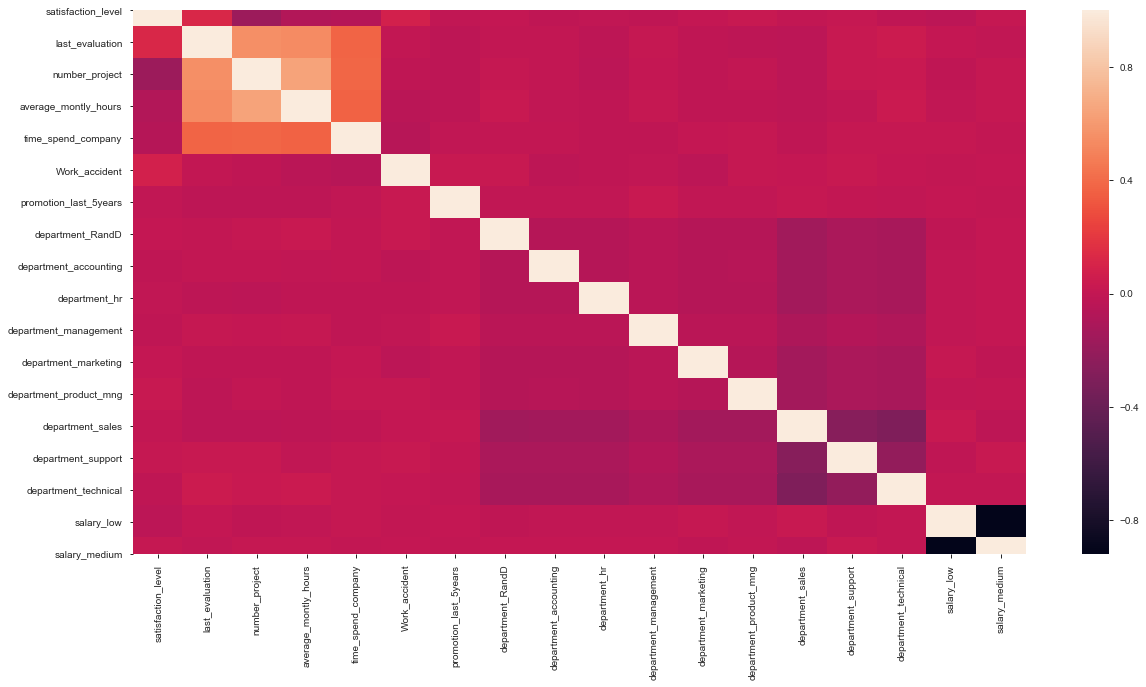

In [22]:
plt.figure(figsize=(20,10))
sns.heatmap(data_x.corr())
plt.show()

# Feature Reduction

### Weight of Evidence

In [23]:
data_bal.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
department                object
salary                    object
dtype: object

In [24]:
data_bal_num = data_bal[data_bal.columns.difference(['department','salary'])]

Should be performed after Encoding

Work_accident
average_montly_hours


C:\Users\guru\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


last_evaluation
number_project
promotion_last_5years
satisfaction_level
time_spend_company


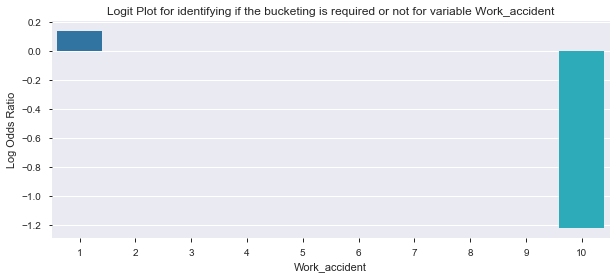

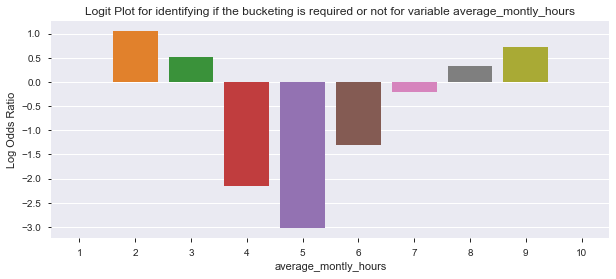

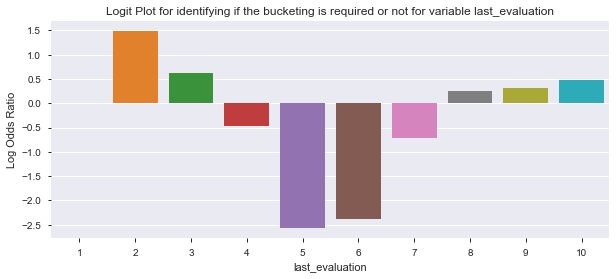

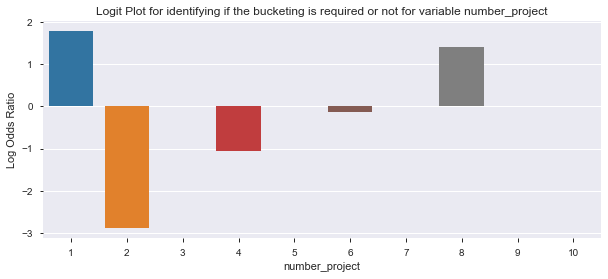

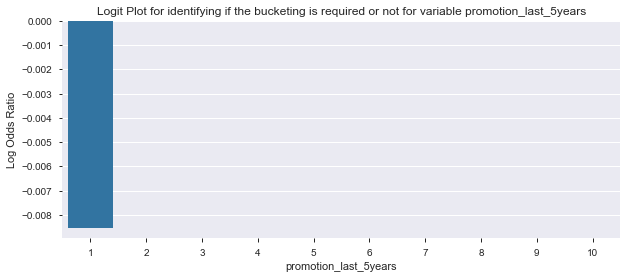

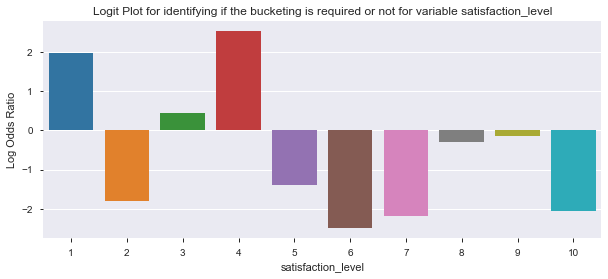

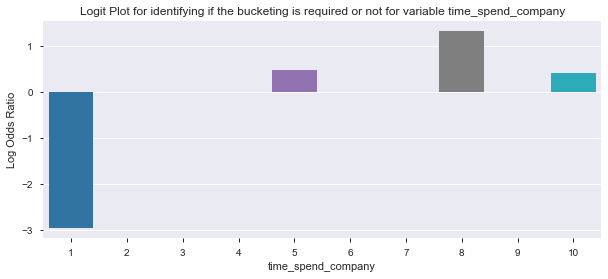

In [29]:
from matplotlib.backends.backend_pdf import PdfPages
bp = PdfPages('Transformation Plots.pdf')

for num_variable in data_bal_num.columns.difference(['left']):
    print(num_variable)
    binned = pd.cut(data_bal_num[num_variable], bins=10, labels=list(range(1,11)))
    #binned = binned.dropna()
    odds = data_bal_num.groupby(binned)['left'].sum() / (data_bal_num.groupby(binned)['left'].count()-data_bal_num.groupby(binned)['left'].sum())
    log_odds = np.log(odds)
    fig,axes = plt.subplots(figsize=(10,4))
    sns.barplot(x=log_odds.index,y=log_odds)
    plt.ylabel('Log Odds Ratio')
    plt.title(str('Logit Plot for identifying if the bucketing is required or not for variable ') + str(num_variable))
    bp.savefig(fig)

bp.close()

### VIF

In [30]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

a,b = dmatrices(formula_like='left ~ '+ 'Work_accident+average_montly_hours+department+last_evaluation+number_project+promotion_last_5years+salary+satisfaction_level+time_spend_company', data = data_bal, return_type='dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(b.values, i) for i in range(b.shape[1])]
vif["features"] = b.columns

In [31]:
vif.sort_values(by=['VIF Factor'])

,VIF Factor,features
16,1.003824,promotion_last_5years
12,1.013646,Work_accident
17,1.124228,satisfaction_level
18,1.256923,time_spend_company
4,1.298062,department[T.management]
6,1.595112,department[T.product_mng]
2,1.598304,department[T.accounting]
3,1.604424,department[T.hr]
5,1.606825,department[T.marketing]
1,1.610808,department[T.RandD]


As per the above Feature Reduction techniques,
- Weight of Evidence - All rows are seem to be equally weighted
- VIF - All rows seemed to be having very low VIF scores (except the "salary" > 5)

In [25]:
data_f= pd.concat([data_x,data_y],axis=1)

In [26]:
data_f.shape

(3991, 19)

In [27]:
data_f.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium,left
2000,0.58,0.74,4,215,3,0,0,0,0,0,0,0,0,1,0,0,1,0,0
2001,0.82,0.67,2,202,3,0,0,0,0,0,0,0,0,1,0,0,1,0,0
2002,0.45,0.69,5,193,3,0,0,0,0,0,0,0,0,1,0,0,1,0,0
2003,0.78,0.82,5,247,3,0,0,0,0,0,0,0,0,1,0,0,1,0,0
2004,0.49,0.60,3,214,2,0,0,0,0,0,0,0,0,1,0,0,1,0,0


In [28]:
data_f_x = data_f[data_f.columns.difference(['left'])]
data_f_y = data_f['left']

**Resampling**

In [29]:
from sklearn.model_selection import train_test_split
#Train and Test split
train_x, test_x, train_y, test_y = train_test_split(data_f_x,data_f_y, test_size=0.3, random_state=42)

In [30]:
train, test = train_test_split(data_f,test_size=0.3,random_state=42)

In [31]:
train_x.shape, train_y.shape

((2793, 18), (2793,))

In [32]:
train_x.tail(2)

,Work_accident,average_montly_hours,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,last_evaluation,number_project,promotion_last_5years,salary_low,salary_medium,satisfaction_level,time_spend_company
1512,0,143,0,0,0,0,0,0,0,0,0,0.52,2,0,0,1,0.45,3
1176,1,151,0,0,1,0,0,0,0,0,0,0.50,2,0,1,0,0.38,3


In [33]:
train.tail(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium,left
1512,0.45,0.52,2,143,3,0,0,0,0,0,0,0,0,0,0,0,0,1,1
1176,0.38,0.50,2,151,3,1,0,0,0,1,0,0,0,0,0,0,1,0,1


## Model Implementation

In [34]:
train.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'department_RandD', 'department_accounting',
       'department_hr', 'department_management', 'department_marketing',
       'department_product_mng', 'department_sales', 'department_support',
       'department_technical', 'salary_low', 'salary_medium', 'left'],
      dtype='object')

satisfaction_level+last_evaluation+number_project+average_montly_hours+time_spend_company+Work_accident+promotion_last_5years+department_RandD+department_accounting+department_hr+department_management+department_marketing+department_product_mng+department_sales+department_support+department_technical+salary_low+salary_medium

import statsmodels.formula.api as sm

Building logistic Regression
logreg = sm.logit(formula='left ~ '+ 'satisfaction_level+last_evaluation+number_project+average_montly_hours+time_spend_company+Work_accident+promotion_last_5years+department_RandD+department_accounting+department_hr+department_management+department_marketing+department_product_mng+department_sales+department_support+department_technical+salary_low+salary_medium', data=data_f)
result = logreg.fit()

print(result.summary2())

#### Building Initial Model using Sklearn

In [35]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(train_x, train_y)

C:\Users\guru\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [36]:
y_pred = classifier.predict(test_x)

In [37]:
y_pred

array([1, 1, 0, ..., 1, 1, 0], dtype=int64)

In [38]:
pd.concat([test_y.reset_index(drop=True),pd.Series(y_pred)],axis=1).head()

,left,0
0,0,1
1,1,1
2,0,0
3,0,0
4,0,0


In [39]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_y, y_pred)

In [40]:
cm

array([[469, 140],
       [ 51, 538]], dtype=int64)

## Model Evaluation

In [41]:
from sklearn import metrics

In [42]:
print('Accuracy train ', metrics.accuracy_score(train['left'], classifier.predict(train_x)))
print('Accuracy test ',metrics.accuracy_score(test['left'],y_pred))

Accuracy train  0.8417472252058719
Accuracy test  0.840567612687813


In [43]:
train_gini = 2*metrics.roc_auc_score(train['left'], classifier.predict(train_x)) - 1
print("Gini train: ", train_gini)

test_gini = 2*metrics.roc_auc_score(test['left'], y_pred) - 1
print("Gini test: ", test_gini)

Gini train:  0.6830834250341762
Gini test:  0.6835275061959682


AUC score

In [44]:
train_auc = metrics.roc_auc_score(train['left'], classifier.predict(train_x))
test_auc = metrics.roc_auc_score(test['left'], y_pred)

print("AUC Train : ", train_auc)
print("AUC Test  : ", test_auc)

AUC Train :  0.8415417125170881
AUC Test  :  0.8417637530979841


# Finding the Optimum Cut-Off

In [45]:
import statsmodels.api as sm

In [46]:
result = sm.Logit(train_y, train_x).fit()

         Current function value: 0.458285
         Iterations: 35


C:\Users\guru\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [47]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   left   No. Observations:                 2793
Model:                          Logit   Df Residuals:                     2775
Method:                           MLE   Df Model:                           17
Date:                Wed, 27 Nov 2019   Pseudo R-squ.:                  0.3388
Time:                        18:41:28   Log-Likelihood:                -1280.0
converged:                      False   LL-Null:                       -1935.9
Covariance Type:            nonrobust   LLR p-value:                1.287e-268
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Work_accident             -1.6440      0.183     -8.980      0.000      -2.003      -1.285
average_montly_hours       0.0022      0.001      1.729      0.084      -0.000       0.005
department_RandD          -0.9992      0.261     -3.824      0.000      -1.511      -0.487
department_accounting     -0.5268      0.268     -1.963      0.050      -1.053      -0.001
department_hr             -0.5662      0.259     -2.189      0.029      -1.073      -0.059
department_management     -0.4402      0.340     -1.294      0.196      -1.107       0.227
department_marketing      -0.5417      0.258     -2.100      0.036      -1.047      -0.036
department_product_mng    -0.3293      0.261     -1.261      0.207      -0.841       0.183
department_sales          -0.4459      0.183     -2.431      0.015      -0.805      -0.086
department_support        -0.3288      0.203     -1.619      0.105      -0.727       0.069
department_technical      -0.5967      0.196     -3.050      0.002      -0.980      -0.213
last_evaluation            0.6241      0.377      1.656      0.098      -0.114       1.363
number_project            -0.5708      0.053    -10.824      0.000      -0.674      -0.467
promotion_last_5years     19.6426   6073.640      0.003      0.997   -1.19e+04    1.19e+04
salary_low                 0.6091      0.202      3.017      0.003       0.213       1.005
salary_medium              0.4165      0.206      2.022      0.043       0.013       0.820
satisfaction_level        -5.1666      0.236    -21.917      0.000      -5.629      -4.705
time_spend_company         1.2110      0.061     19.768      0.000       1.091       1.331
==========================================================================================
"""

In [50]:
def Find_Optimal_Cutoff(target, predicted):
    """ Find the optimal probability cutoff point for a classification model related to event rate
    Parameters
    ----------
    target : Matrix with dependent or target data, where rows are observations

    predicted : Matrix with predicted data, where rows are observations

    Returns
    -------     
    list type, with optimal cutoff value

    """
    ####################################
    # The optimal cut off would be where tpr is high and fpr is low
    # tpr - (1-fpr) is zero or near to zero is the optimal cut off point
    ####################################
    fpr, tpr, threshold = metrics.roc_curve(target, predicted)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.ix[(roc.tf-0).abs().argsort()[:1]]
    
    return list(roc_t['threshold']) 

In [51]:
# Add prediction probability to dataframe
train['pred_probs'] = result.predict(train_x)

# Find optimal probability threshold
threshold = Find_Optimal_Cutoff(train_y, train['pred_probs'])
print (threshold)

[0.5726798670662026]


C:\Users\guru\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\guru\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated


In [57]:
train.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium,left,pred_probs
2208,0.60,0.89,3,167,4,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0.592059
448,0.36,0.48,2,159,3,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0.826543
2565,0.48,0.67,5,273,3,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0.355882
2313,0.98,0.77,3,134,2,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0.006316
2601,0.76,0.80,5,229,2,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0.029895


In [52]:
# Find prediction to the dataframe applying threshold
train['pred'] = train['pred_probs'].apply(lambda x: 1 if x > threshold[0] else 0)

C:\Users\guru\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [59]:
train.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department_RandD,department_accounting,department_hr,...,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium,left,pred_probs,pred
2208,0.60,0.89,3,167,4,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0.592059,1
448,0.36,0.48,2,159,3,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0.826543,1
2565,0.48,0.67,5,273,3,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0.355882,0
2313,0.98,0.77,3,134,2,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0.006316,0
2601,0.76,0.80,5,229,2,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0.029895,0


In [60]:
# Print confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(train['left'], train['pred'])

array([[1158,  233],
       [ 236, 1166]], dtype=int64)

In [61]:
confusion_matrix(train_y,classifier.predict(train_x)) #For Sklearn 

array([[1098,  293],
       [ 149, 1253]], dtype=int64)

## Predicting based on the Test for the Optimum threshold

In [62]:
result_test = sm.Logit(test_y, test_x).fit()

         Current function value: 0.477494
         Iterations: 35


C:\Users\guru\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [63]:
result_test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   left   No. Observations:                 1198
Model:                          Logit   Df Residuals:                     1180
Method:                           MLE   Df Model:                           17
Date:                Wed, 27 Nov 2019   Pseudo R-squ.:                  0.3110
Time:                        12:54:49   Log-Likelihood:                -572.04
converged:                      False   LL-Null:                       -830.22
Covariance Type:            nonrobust   LLR p-value:                 6.708e-99
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Work_accident             -1.3717      0.259     -5.297      0.000      -1.879      -0.864
average_montly_hours       0.0052      0.002      2.681      0.007       0.001       0.009
department_RandD          -0.5866      0.408     -1.439      0.150      -1.385       0.212
department_accounting     -0.0372      0.368     -0.101      0.919      -0.758       0.684
department_hr              0.4125      0.407      1.014      0.311      -0.385       1.210
department_management     -0.1631      0.543     -0.301      0.764      -1.227       0.901
department_marketing      -0.0832      0.386     -0.216      0.829      -0.839       0.673
department_product_mng     0.2267      0.406      0.558      0.577      -0.569       1.023
department_sales           0.2202      0.271      0.813      0.416      -0.311       0.751
department_support        -0.0331      0.302     -0.110      0.913      -0.625       0.559
department_technical       0.2517      0.286      0.881      0.378      -0.308       0.812
last_evaluation           -0.2969      0.540     -0.549      0.583      -1.356       0.762
number_project            -0.5532      0.081     -6.848      0.000      -0.712      -0.395
promotion_last_5years     29.2809   1.06e+06   2.77e-05      1.000   -2.07e+06    2.07e+06
salary_low                 0.4539      0.303      1.496      0.135      -0.141       1.048
salary_medium              0.0046      0.310      0.015      0.988      -0.603       0.612
satisfaction_level        -4.8317      0.345    -13.990      0.000      -5.509      -4.155
time_spend_company         1.0352      0.089     11.602      0.000       0.860       1.210
==========================================================================================
"""

In [64]:
test['pred_probs'] = result.predict(test_x)

C:\Users\guru\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [104]:
# Find prediction to the dataframe applying threshold
test['pred'] = test['pred_probs'].apply(lambda x: 1 if x > threshold[0] else 0)

C:\Users\guru\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [66]:
test.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department_RandD,department_accounting,department_hr,...,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium,left,pred_probs,pred
3487,0.14,0.46,2,267,6,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0.992703,1
96,0.10,0.77,6,265,4,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0.893832,1
3718,0.82,0.58,4,136,3,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0.105521,0
2864,0.64,0.66,3,218,3,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0.381984,0
3795,0.17,0.88,6,226,3,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0.134316,0


In [67]:
confusion_matrix(test['left'], test['pred'])

array([[492, 117],
       [ 85, 504]], dtype=int64)

In [68]:
confusion_matrix(test['left'],y_pred) #For Sklearn model

array([[469, 140],
       [ 51, 538]], dtype=int64)

In [69]:
469+538

1007

In [70]:
492+504

996

In [71]:
# AUC scores for the stats model with Optimum threshold
train_auc = metrics.roc_auc_score(train['left'], train['pred_probs'])
test_auc = metrics.roc_auc_score(test['left'], test['pred_probs'])

print("AUC Train : ", train_auc)
print("AUC Test  : ", test_auc)

AUC Train :  0.8710581884152351
AUC Test  :  0.8543801104541108


AUC got from sklearn got from the Sklearn before optimal cut-off<br>
AUC Train :  0.8415417125170881 <br>
AUC Test  :  0.8417637530979841

In [72]:
train_gini = 2*metrics.roc_auc_score(train['left'], train['pred_probs']) - 1
print("Gini train: ", train_gini)

test_gini = 2*metrics.roc_auc_score(test['left'], test['pred_probs']) - 1
print("Gini test: ", test_gini)

Gini train:  0.7421163768304702
Gini test:  0.7087602209082215


Somer's D / Gini score got from the Sklearn before optimal cut-off <br>
Gini train:  0.6830834250341762 <br>
Gini test:  0.6835275061959682

In [73]:
print(metrics.classification_report(test['left'], test['pred']))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83       609
           1       0.81      0.86      0.83       589

    accuracy                           0.83      1198
   macro avg       0.83      0.83      0.83      1198
weighted avg       0.83      0.83      0.83      1198



In [74]:
print(metrics.classification_report(test['left'], y_pred))

              precision    recall  f1-score   support

           0       0.90      0.77      0.83       609
           1       0.79      0.91      0.85       589

    accuracy                           0.84      1198
   macro avg       0.85      0.84      0.84      1198
weighted avg       0.85      0.84      0.84      1198



### Conclusion From ROC Analysis: <br> 
**Comparing the AUC and Somer's D scores before and after applying the Optimal threshold (0.5726798670662026), We can find the both scores have increased considerably in after case.**

**--------------------------------------------------------------------------------------------------------------------------------------------------------------------**

# Decile Analysis

## For Train 

In [76]:
train['Deciles']=pd.qcut(train['pred_probs'],10, labels=False)

C:\Users\guru\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [77]:
train.head(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department_RandD,department_accounting,department_hr,...,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium,left,pred_probs,pred,Deciles
2208,0.60,0.89,3,167,4,0,0,1,0,0,...,0,0,0,0,0,1,0,0.592059,1,5
448,0.36,0.48,2,159,3,0,0,0,0,0,...,1,0,0,0,1,0,1,0.826543,1,8


In [79]:
no_1s = train[['Deciles','left']].groupby(train.Deciles).sum().sort_index(ascending=False)['left']
no_total = train[['Deciles','left']].groupby(train.Deciles).count().sort_index(ascending=False)['left']
max_prob = train[['Deciles','pred_probs']].groupby(train.Deciles).max().sort_index(ascending=False)['pred_probs']
min_prob = train[['Deciles','pred_probs']].groupby(train.Deciles).min().sort_index(ascending=False)['pred_probs']

In [80]:
Decile_analysis_train = pd.concat([ min_prob, max_prob, no_1s, no_total-no_1s, no_total], axis=1)

In [81]:
Decile_analysis_train.columns = ['Min_prob', 'Max_prob', '#1', '#0', 'Total']

In [84]:
Decile_analysis_train = Decile_analysis_train.reset_index(drop=True)

In [89]:
Decile_analysis_train.to_excel("HR Decile.xlsx")

## For Test

In [90]:
test['Deciles']=pd.qcut(test['pred_probs'],10, labels=False)

C:\Users\guru\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [91]:
no_1s = test[['Deciles','left']].groupby(test.Deciles).sum().sort_index(ascending=False)['left']
no_total = test[['Deciles','left']].groupby(test.Deciles).count().sort_index(ascending=False)['left']
max_prob = test[['Deciles','pred_probs']].groupby(test.Deciles).max().sort_index(ascending=False)['pred_probs']
min_prob = test[['Deciles','pred_probs']].groupby(test.Deciles).min().sort_index(ascending=False)['pred_probs']

In [93]:
Decile_analysis_test = pd.concat([ min_prob, max_prob, no_1s, no_total-no_1s, no_total], axis=1)

In [94]:
Decile_analysis_test.columns = ['Min_prob', 'Max_prob', '#1', '#0', 'Total']

In [95]:
Decile_analysis_test = Decile_analysis_test.reset_index(drop=True)

In [96]:
Decile_analysis_test.to_excel("HR Decile test.xlsx")

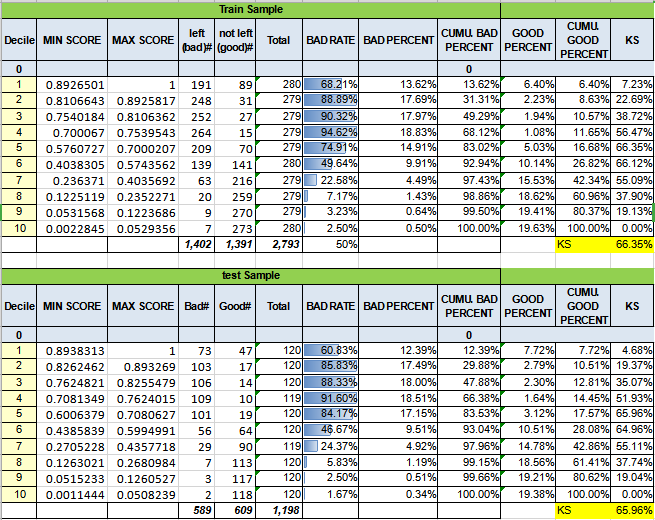

**As per Decile Analysis, KS score comes out to be** <br>
> - train : KS	66.35%  --  and the corresponding Min Prob Score is 0.57 <br>
> - test  : KS	65.96%  -- and the corresponding Min Prob Score is 0.60 

### Conclusion from Decile Analysis: <br>
- As per the above analysis the optimum cut-off came out to be 0.57 
- The cut-off got from the ROC curve is more or less the same.
- Therefore, we can conclude that optimum threshold is 0.57 and our model is stable

## Visualization

**ROC curve for test**

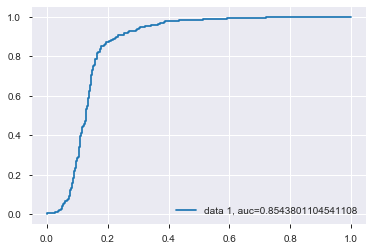

In [129]:
fpr, tpr, _ = metrics.roc_curve(test.left,  test.pred_probs)
auc = metrics.roc_auc_score(test.left, test.pred_probs)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

**ROC Curve for Train**

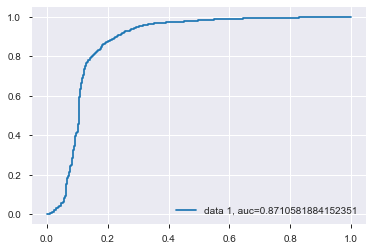

In [130]:
fpr, tpr, _ = metrics.roc_curve(train.left,  train.pred_probs)
auc = metrics.roc_auc_score(train.left, train.pred_probs)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()